In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
import yaml
plt.rcParams['figure.figsize']=[16,9]

In [2]:
calibrator = Calibrator('calibration.pkl',redo=False)
calibrator.create_all_teams()
calibrator.process_data(verbose=True)
teams=calibrator.teams
calibrator.get_current_results('BPL',only_done=True).tail(10)

calibration.pkl  exists.
file exists, loading
2276


,Date,League,HomeTeam,AwayTeam,FTHG,FTAG,xg1,xg2,nsxg1,nsxg2
18019,2019-02-09,BPL,Fulham,Manchester United,0,3,2.13,2.11,1.57,2.27
18039,2019-02-09,BPL,Crystal Palace,West Ham United,1,1,2.42,1.59,2.40,1.49
18051,2019-02-09,BPL,Southampton,Cardiff City,1,2,1.72,0.48,1.40,1.04
18062,2019-02-09,BPL,Liverpool,AFC Bournemouth,3,0,2.52,0.42,2.59,0.91
18063,2019-02-09,BPL,Watford,Everton,1,0,1.43,0.73,1.36,1.17
18070,2019-02-09,BPL,Huddersfield Town,Arsenal,1,2,1.26,1.70,0.68,1.10
18086,2019-02-09,BPL,Brighton and Hove Albion,Burnley,1,3,1.41,1.84,1.92,0.77
18133,2019-02-10,BPL,Tottenham Hotspur,Leicester City,3,1,1.18,3.18,1.20,1.77
18156,2019-02-10,BPL,Manchester City,Chelsea,6,0,4.08,1.02,1.61,2.09
18188,2019-02-11,BPL,Wolverhampton,Newcastle,1,1,2.56,0.48,1.71,1.02


In [3]:
print(calibrator.raw_data['League'].unique())
calibrator.raw_data.loc[calibrator.raw_data['League']=='ELC'];

['NT' 'SA' 'USL' 'MLS' 'NWSL' 'DS' 'BSA' 'MPDTA' 'SRSL' 'FL2' 'BJL' 'ATB'
 'RPL' 'JJL' 'CSL' 'G2B' 'ELC' 'ELO' 'SAAPL' 'ELT' 'SP' 'DE' 'FL1' 'TTSL'
 'BPL' 'PL' 'APD' 'SSD' 'SPD' 'ISA' 'GB' 'ISB' 'GSL' 'UCL' 'UEL' 'AA'
 'MPDTC']


In [4]:
Teams=dict()
League=dict()

In [5]:
country='UEFA'
home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if x in ['FL1', 'BPL', 'SPD', 'ISA', 'GB', 'DE', 'PL', 'RPL']}
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=2,nr_degr=4)

#League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
df=League[country].season_report()
df['Rating']=df['Off']*(1-df['Deff'])
df

[0, 1]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr,Rating
GB,0,26.6,19,34,5,1,48.49,75.74,5.16,0.33,5.83,3.4572
SPD,0,25.4,18,33,5,1,34.77,66.65,4.14,0.27,9.33,3.0222
ISA,0,19.5,12,28,8,1,5.62,17.69,3.11,0.31,44.76,2.1459
BPL,0,18.6,11,26,8,2,3.78,13.24,3.10,0.34,53.02,2.0460
PL,0,17.5,10,26,8,2,3.00,10.03,3.38,0.40,62.70,2.0280
DE,0,16.3,9,24,8,2,1.89,6.99,3.99,0.52,71.02,1.9152
FL1,0,15.7,8,24,8,2,1.34,5.39,3.62,0.49,75.33,1.8462
RPL,0,15.3,8,23,8,3,1.11,4.27,3.23,0.45,78.01,1.7765


In [6]:
league_info = yaml.load(open('config.yaml','r'))
for name,info in league_info.items():
    lH,pH=calibrator.teams[name+'Home'].means()
    lA,pA=calibrator.teams[name+'Away'].means()
    home_advantage=np.array([lH-lA,pH/pA])
    Teams[name]= calibrator.get_teams_for_league(name)
    League[name]=Season(Teams[name],home_advantage=home_advantage,nr_cl=info['nr_cl'],nr_degr=info['nr_deg'])
    League[name].process_current_results(calibrator.get_current_results(name))
    
    print(name,info)

BPL {'nr_cl': 4, 'nr_deg': 3}
FL1 {'nr_cl': 3, 'nr_deg': 3}
SPD {'nr_cl': 4, 'nr_deg': 4}
ISA {'nr_cl': 4, 'nr_deg': 3}
GB {'nr_cl': 4, 'nr_deg': 3}
DE {'nr_cl': 2, 'nr_deg': 3}
ELC {'nr_cl': 3, 'nr_deg': 3}
PL {'nr_cl': 2, 'nr_deg': 2}


In [7]:
PremierLeague=League['BPL']
PremierLeague.simulate_season(n_scenarios=int(1e5))

,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,65,93.9,88,99,2,1,61.04,100.00,5.42,0.17,0.00
Manchester City,65,92.1,86,98,2,1,38.23,100.00,6.84,0.24,0.00
Tottenham Hotspur,60,83.1,76,90,4,2,0.74,99.21,4.97,0.30,0.00
Manchester United,51,71.5,64,79,6,4,0.00,43.44,4.93,0.39,0.00
Arsenal,50,70.5,63,78,6,4,0.00,33.04,4.91,0.44,0.00
Chelsea,50,69.7,63,77,6,4,0.00,24.26,3.97,0.36,0.00
Wolverhampton,39,57.1,50,64,10,7,0.00,0.05,3.35,0.38,0.00
Watford,37,53.0,46,60,12,7,0.00,0.00,3.20,0.40,0.00
Leicester City,32,49.4,42,56,14,7,0.00,0.00,2.85,0.37,0.03
AFC Bournemouth,33,48.5,42,56,14,8,0.00,0.00,3.48,0.50,0.06


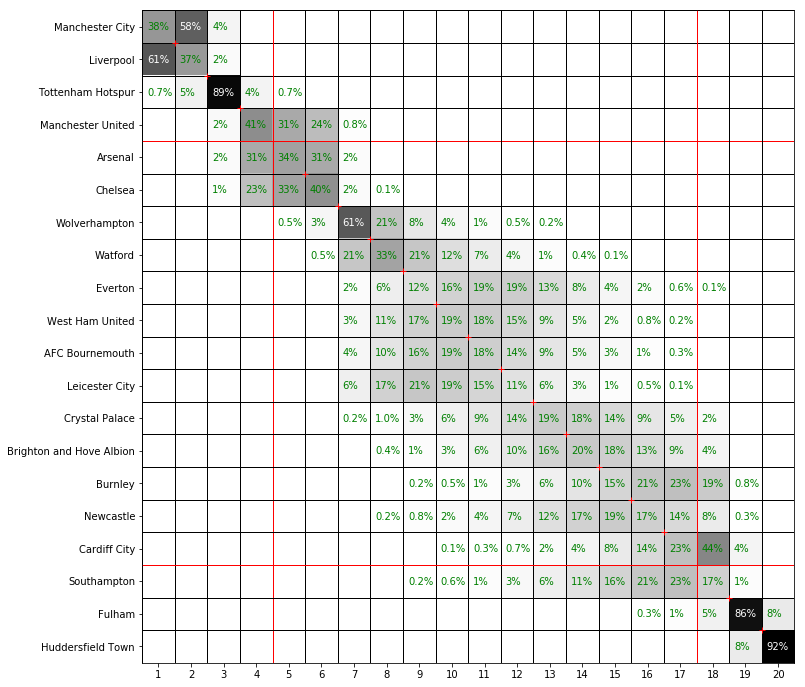

In [8]:
country='BPL'
League[country].process_simulation(verbose=False)
team_names,T,_=League[country].probability_grid()
League[country].season_report()

0.0


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,65,67.0,65,68,2,1,81.21,100.00,5.42,0.17,0.00
Manchester City,65,65.0,65,65,2,1,18.79,100.00,6.84,0.24,0.00
Tottenham Hotspur,60,62.2,60,63,3,3,0.00,100.00,4.97,0.30,0.00
Arsenal,50,52.2,50,53,6,4,0.00,51.45,4.91,0.44,0.00
Chelsea,50,52.0,50,53,6,4,0.00,23.50,3.97,0.36,0.00
Manchester United,51,51.8,51,54,6,4,0.00,25.05,4.93,0.39,0.00
Wolverhampton,39,40.4,39,42,8,7,0.00,0.00,3.35,0.38,0.00
Watford,37,38.6,37,40,8,7,0.00,0.00,3.20,0.40,0.00
West Ham United,33,35.1,33,36,12,9,0.00,0.00,2.94,0.43,0.00
AFC Bournemouth,33,34.4,33,36,12,9,0.00,0.00,3.48,0.50,0.00


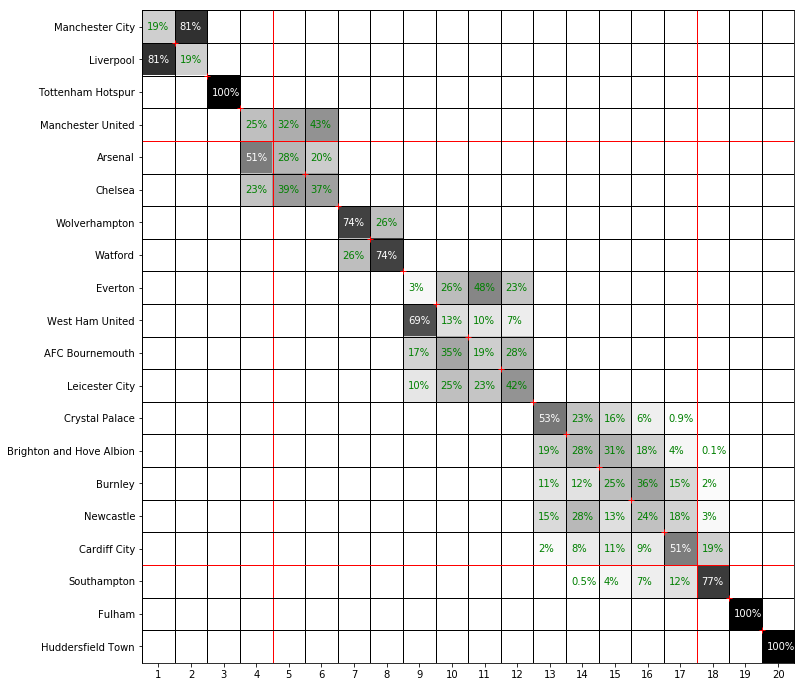

In [9]:
PremierLeague=League['BPL']
PremierLeague.process_simulation(max_date=pd.Timestamp('2019-02-24'),verbose=False)
team_name='Manchester United'
ind = np.ones(PremierLeague.place_per_team.shape[1]).astype(bool)
match_id = PremierLeague.matches_to_sim['Arsenal v Manchester United']['id']
ind = ind&(PremierLeague.simulated_home_goals[match_id]<PremierLeague.simulated_away_goals[match_id])
match_id = PremierLeague.matches_to_sim['Manchester United v Chelsea']['id']
ind = ind |( PremierLeague.simulated_home_goals[match_id]>PremierLeague.simulated_away_goals[match_id])

#ind = np.ones(PremierLeague.place_per_team.shape[1]).astype(bool)
#ind = ind & ( PremierLeague.simulated_home_goals[match_id]>PremierLeague.simulated_away_goals[match_id])
#ind = ind & ( PremierLeague.simulated_home_goals[match_id]<PremierLeague.simulated_away_goals[match_id])
#ind = ind &(PremierLeague.place_per_team[PremierLeague.team_id['Liverpool'],:]>1)


#ind = (PremierLeague.place_per_team[PremierLeague.team_id['Manchester United'],:]<=6)
match_id = PremierLeague.matches_to_sim['Manchester United v Liverpool']['id']
ind = (PremierLeague.simulated_home_goals[match_id]>PremierLeague.simulated_away_goals[match_id])

ind = PremierLeague.points_per_team[PremierLeague.team_id['Manchester United'],:]>=PremierLeague.current_points['Manchester United']+12*2

print(100*ind.sum()/ind.size)
ind = None
team_names,T,_=PremierLeague.probability_grid(ind=ind)
PremierLeague.season_report(ind=ind)


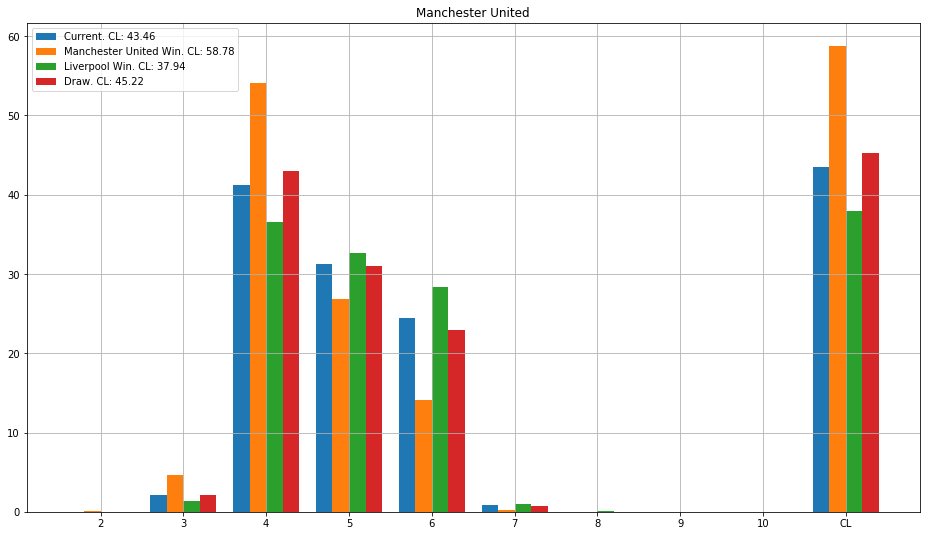

In [16]:
PremierLeague=League['BPL']
PremierLeague.process_simulation(verbose=False)
_,fig=PremierLeague.what_if(PremierLeague.matches_to_sim['Manchester United v Liverpool'],ref_team=teams['Manchester United'])

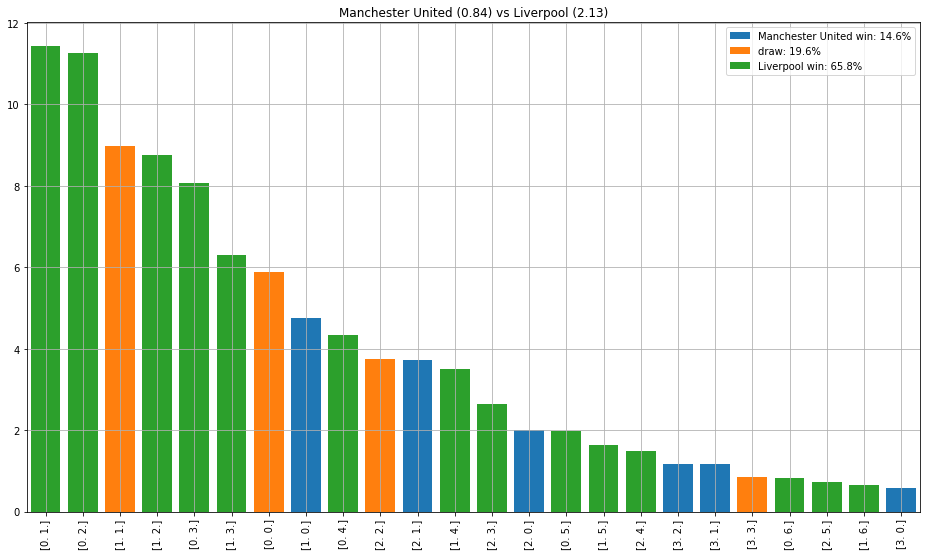

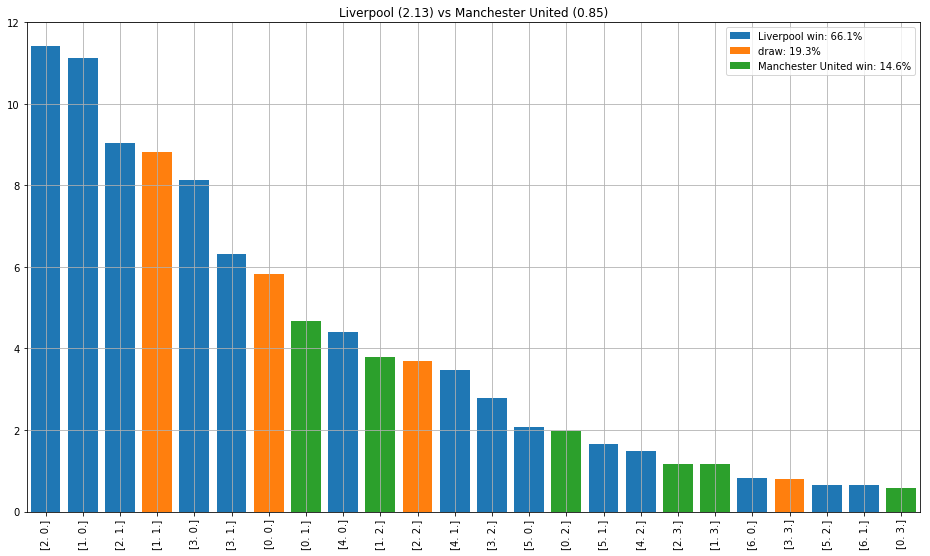

In [17]:
team1=teams['Manchester United']
#team1=teams['Manchester City']
team2=teams['Brighton and Hove Albion']
team2=teams['Chelsea']
team2=teams['Liverpool']
#team2=teams['Leicester City']
fig=plt.figure(1)
home_advantage=np.array([lH-lA,pH/pA])
home_advantage=np.array([0,1])
team1.outcomes_vs(team2,home_advantage=home_advantage)
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=home_advantage)
fig = plt.gcf()
fig.set_size_inches(16,9)

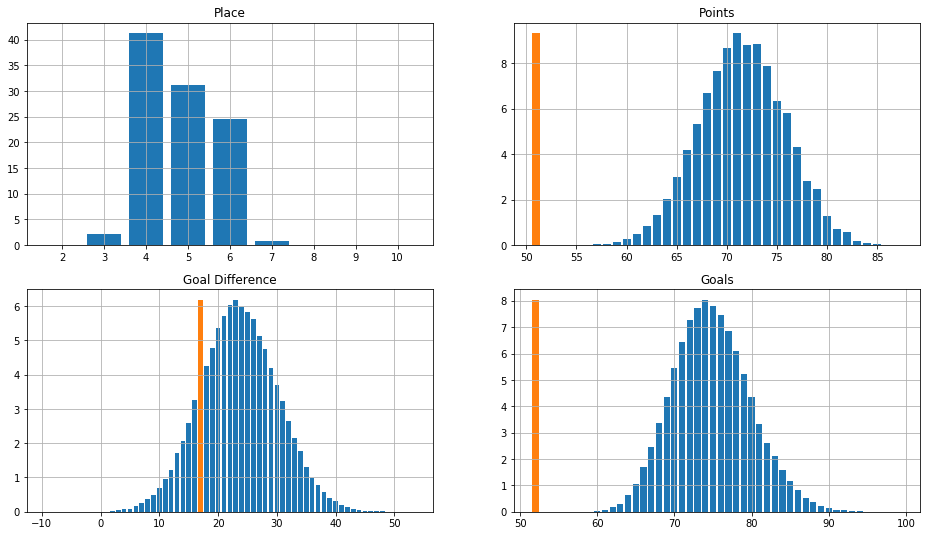

In [18]:
PremierLeague=League['BPL']
PremierLeague.team_report(teams['Manchester United'])

# Most important matches

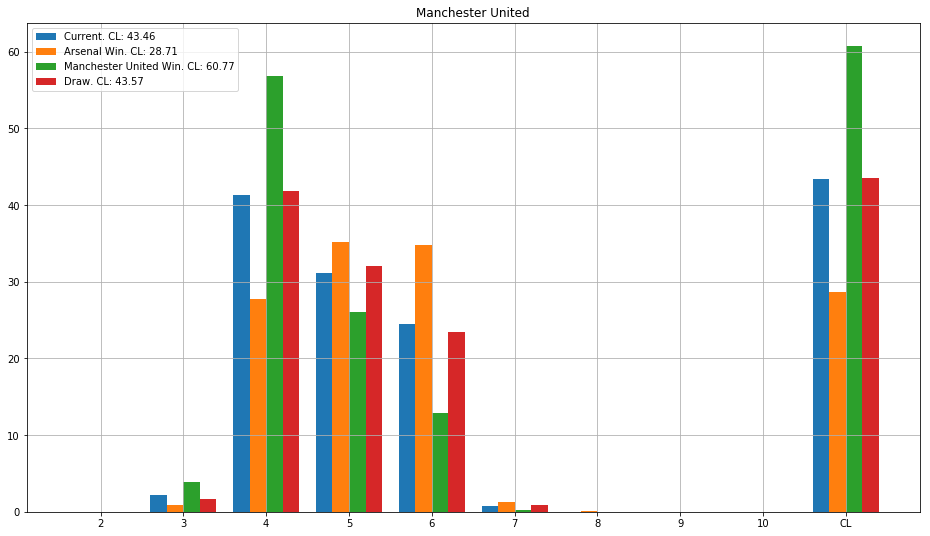

In [19]:
imp=[]
ref_team=teams['Manchester United']
# ref_team='Liverpool'
# ref_team='Arsenal'
matches=[]
PremierLeague=League['BPL']
for x,_match_to_sim in PremierLeague.matches_to_sim.items():
    matches.append(x)
    pcl,_=PremierLeague.what_if(_match_to_sim,ref_team=ref_team,show_plot=False,place=4,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    #imp.append(pcl.std())
    imp.append(np.abs(pcl[1:-1]-pcl[0]).mean())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
pcl,fig=PremierLeague.what_if(PremierLeague.matches_to_sim[the_match],ref_team=ref_team)

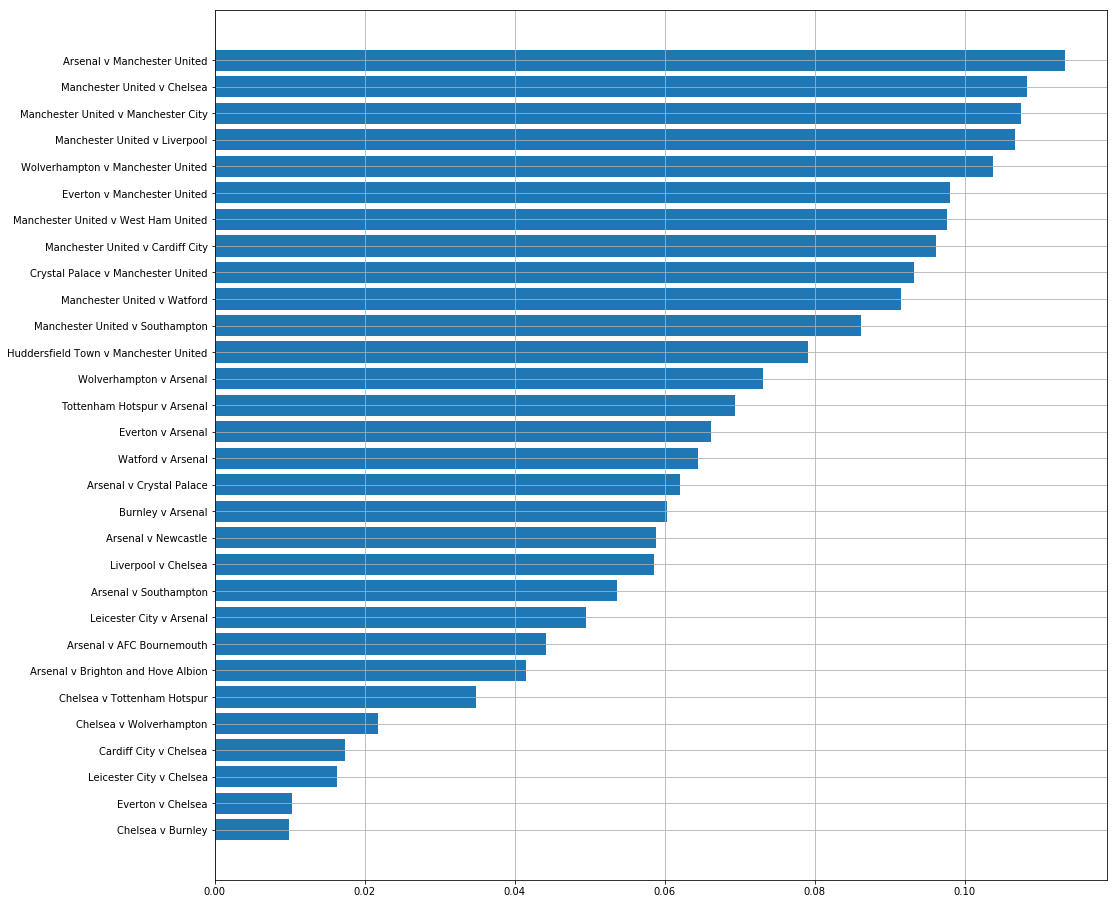

In [20]:
i_sort=(imp).argsort()
#matches=matches[i_sort]
#imp=imp[i_sort]
xx=np.arange(30)
plt.barh(xx,imp[i_sort][xx])
plt.yticks(xx,matches[i_sort][-xx.size:],rotation=0);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,16)

1.7095258333333332

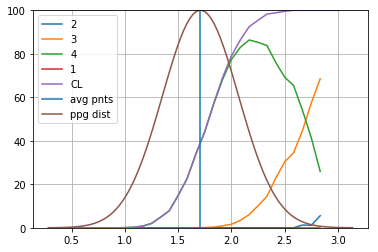

In [21]:
team_name='Manchester United'
#team_name='Liverpool'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    
ind = np.isnan(p[:,3])
p[ind,3]=np.interp(nrpnts[ind],nrpnts[~ind],p[~ind,3])

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
mu=pnts.mean()/n
plt.axvline(mu,label='avg pnts')
s=(pnts/n).std()
from scipy.stats import norm
x=np.linspace(mu-4*s,mu+4*s,100)
y=norm.pdf((x-mu)/s)
y=100*y/y.max()
plt.plot(x,y,label='ppg dist')
plt.legend()
pnts.mean()/n

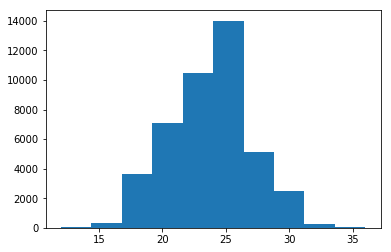

In [22]:
team_name='Manchester United'
#team_name='Liverpool'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
ind=PremierLeague.place_per_team[i,:]<=4
plt.hist((PremierLeague.points_per_team[i,ind]-PremierLeague.current_points[team_name]),10);

In [23]:
def points(x):
    return 3*x[0]+x[1]

def prob(x):
    return np.round(100*np.interp(points(x),nrpnts,p[:,3]),2)
    

[(nW,nD,n-nW-nD,points((nW,nD)),prob((nW,nD))) for nW in range(n+1) for nD in range(n+1) if n-nW-nD>=0 and prob((nW,nD))>=90]

[(7, 5, 0, 26, 92.5),
 (8, 2, 2, 26, 92.5),
 (8, 3, 1, 27, 95.43),
 (8, 4, 0, 28, 98.28),
 (9, 0, 3, 27, 95.43),
 (9, 1, 2, 28, 98.28),
 (9, 2, 1, 29, 98.89),
 (9, 3, 0, 30, 99.57),
 (10, 0, 2, 30, 99.57),
 (10, 1, 1, 31, 100.0),
 (10, 2, 0, 32, 100.0),
 (11, 0, 1, 33, 100.0),
 (11, 1, 0, 34, 100.0),
 (12, 0, 0, 36, 100.0)]